In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad  # Make sure to import anndata
import matplotlib.pyplot as pl
import seaborn as sns
import bbknn
import scvelo as scv
import anndata
import leidenalg
import loompy
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
from matplotlib.pyplot import rc_context
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import random
import mellon

In [2]:
import os
import scanpy as sc

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")
adata = sc.read_h5ad('combined dataincrease mt10.h5ad')
adata

AnnData object with n_obs × n_vars = 49285 × 55389
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'

In [3]:
adata.obs.groupby('Sample').count()

batch  doublet  n_genes  n_genes_by_counts  total_counts  \
Sample                                                                  
YSham_GFP     2355     2355     2355               2355          2355   
YSham_noGFP   6930     6930     6930               6930          6930   
YOV_GFP       4044     4044     4044               4044          4044   
YOV_noGFP     6783     6783     6783               6783          6783   
ASham_GFP     1903     1903     1903               1903          1903   
ASham_noGFP   9075     9075     9075               9075          9075   
AOV_GFP       8064     8064     8064               8064          8064   
AOV_noGFP    10131    10131    10131              10131         10131   

             total_counts_mt  pct_counts_mt  
Sample                                       
YSham_GFP               2355           2355  
YSham_noGFP             6930           6930  
YOV_GFP                 4044           4044  
YOV_noGFP               6783           6783  
ASham_GFP               1903           1903  
ASham_noGFP             9075           9075  
AOV_GFP                 8064           8064  
AOV_noGFP              10131          10131

In [4]:
sc.pp.filter_genes(adata, min_cells = 10)
adata

AnnData object with n_obs × n_vars = 49285 × 32054
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells'

In [4]:
sc.pp.filter_genes(adata, min_cells = 3)
adata

AnnData object with n_obs × n_vars = 49285 × 38198
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells'

In [5]:
adata.layers['counts'] = adata.X.copy()

In [6]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [7]:
adata.obs.head()

batch  doublet  n_genes  n_genes_by_counts  \
AAACCCATCCCACAGG-1-YSham_GFP  YSham_GFP    False     2461               2461   
AAACGAACATACCACA-1-YSham_GFP  YSham_GFP    False     2740               2738   
AAACGAAGTCGTGGTC-1-YSham_GFP  YSham_GFP    False     2794               2792   
AAACGCTAGGTGAGCT-1-YSham_GFP  YSham_GFP    False      616                616   
AAACGCTCAAGAGAGA-1-YSham_GFP  YSham_GFP    False     2038               2037   

                              total_counts  total_counts_mt  pct_counts_mt  \
AAACCCATCCCACAGG-1-YSham_GFP        7575.0            211.0       2.785479   
AAACGAACATACCACA-1-YSham_GFP        9304.0            271.0       2.912726   
AAACGAAGTCGTGGTC-1-YSham_GFP        9587.0            582.0       6.070721   
AAACGCTAGGTGAGCT-1-YSham_GFP        1464.0              0.0       0.000000   
AAACGCTCAAGAGAGA-1-YSham_GFP        5815.0            174.0       2.992261   

                                 Sample  
AAACCCATCCCACAGG-1-YSham_GFP  YSham_GFP  
AAACGAACATACCACA-1-YSham_GFP  YSham_GFP  
AAACGAAGTCGTGGTC-1-YSham_GFP  YSham_GFP  
AAACGCTAGGTGAGCT-1-YSham_GFP  YSham_GFP  
AAACGCTCAAGAGAGA-1-YSham_GFP  YSham_GFP

In [7]:
adata

AnnData object with n_obs × n_vars = 49285 × 38198
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

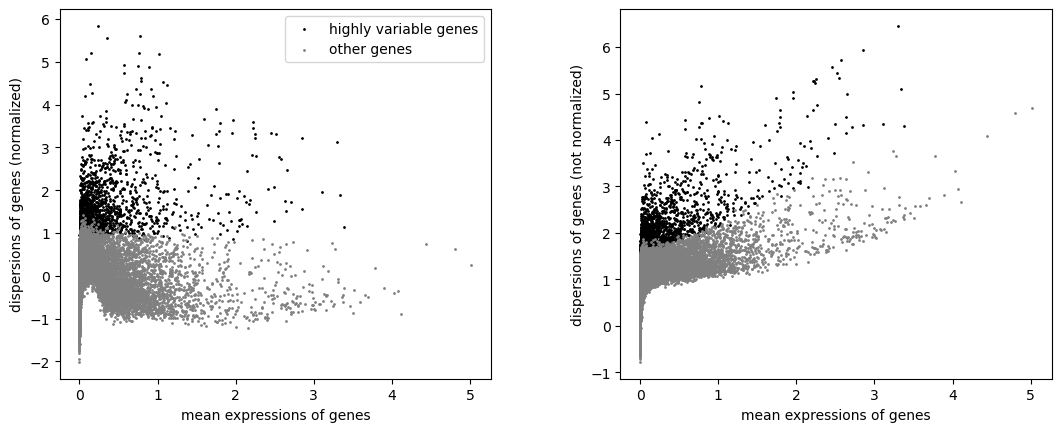

In [8]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_bins=20, batch_key='Sample', n_top_genes=2000)

sc.pl.highly_variable_genes(adata)#, save=f"{projID}_high_variable_{n3}.png")

In [8]:
adata.raw = adata

In [9]:
adata

AnnData object with n_obs × n_vars = 49285 × 32054
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [10]:
adata = adata[:, adata.var['highly_variable']].copy()
print(adata.shape)  


(49285, 2000)


In [9]:
sc.pp.scale(adata, max_value=10) 

In [10]:
sc.tl.pca(adata, svd_solver='arpack')

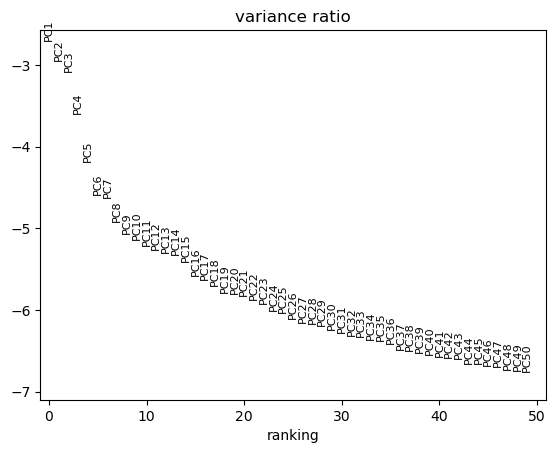

In [11]:
# Plot PCA variance ratio
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [12]:
adata

AnnData object with n_obs × n_vars = 49285 × 38198
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [13]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
#BBKNN
bbknn.bbknn(adata, batch_key="Sample")
sc.tl.umap(adata)

In [14]:
sc.tl.leiden(adata, resolution = 0.7)

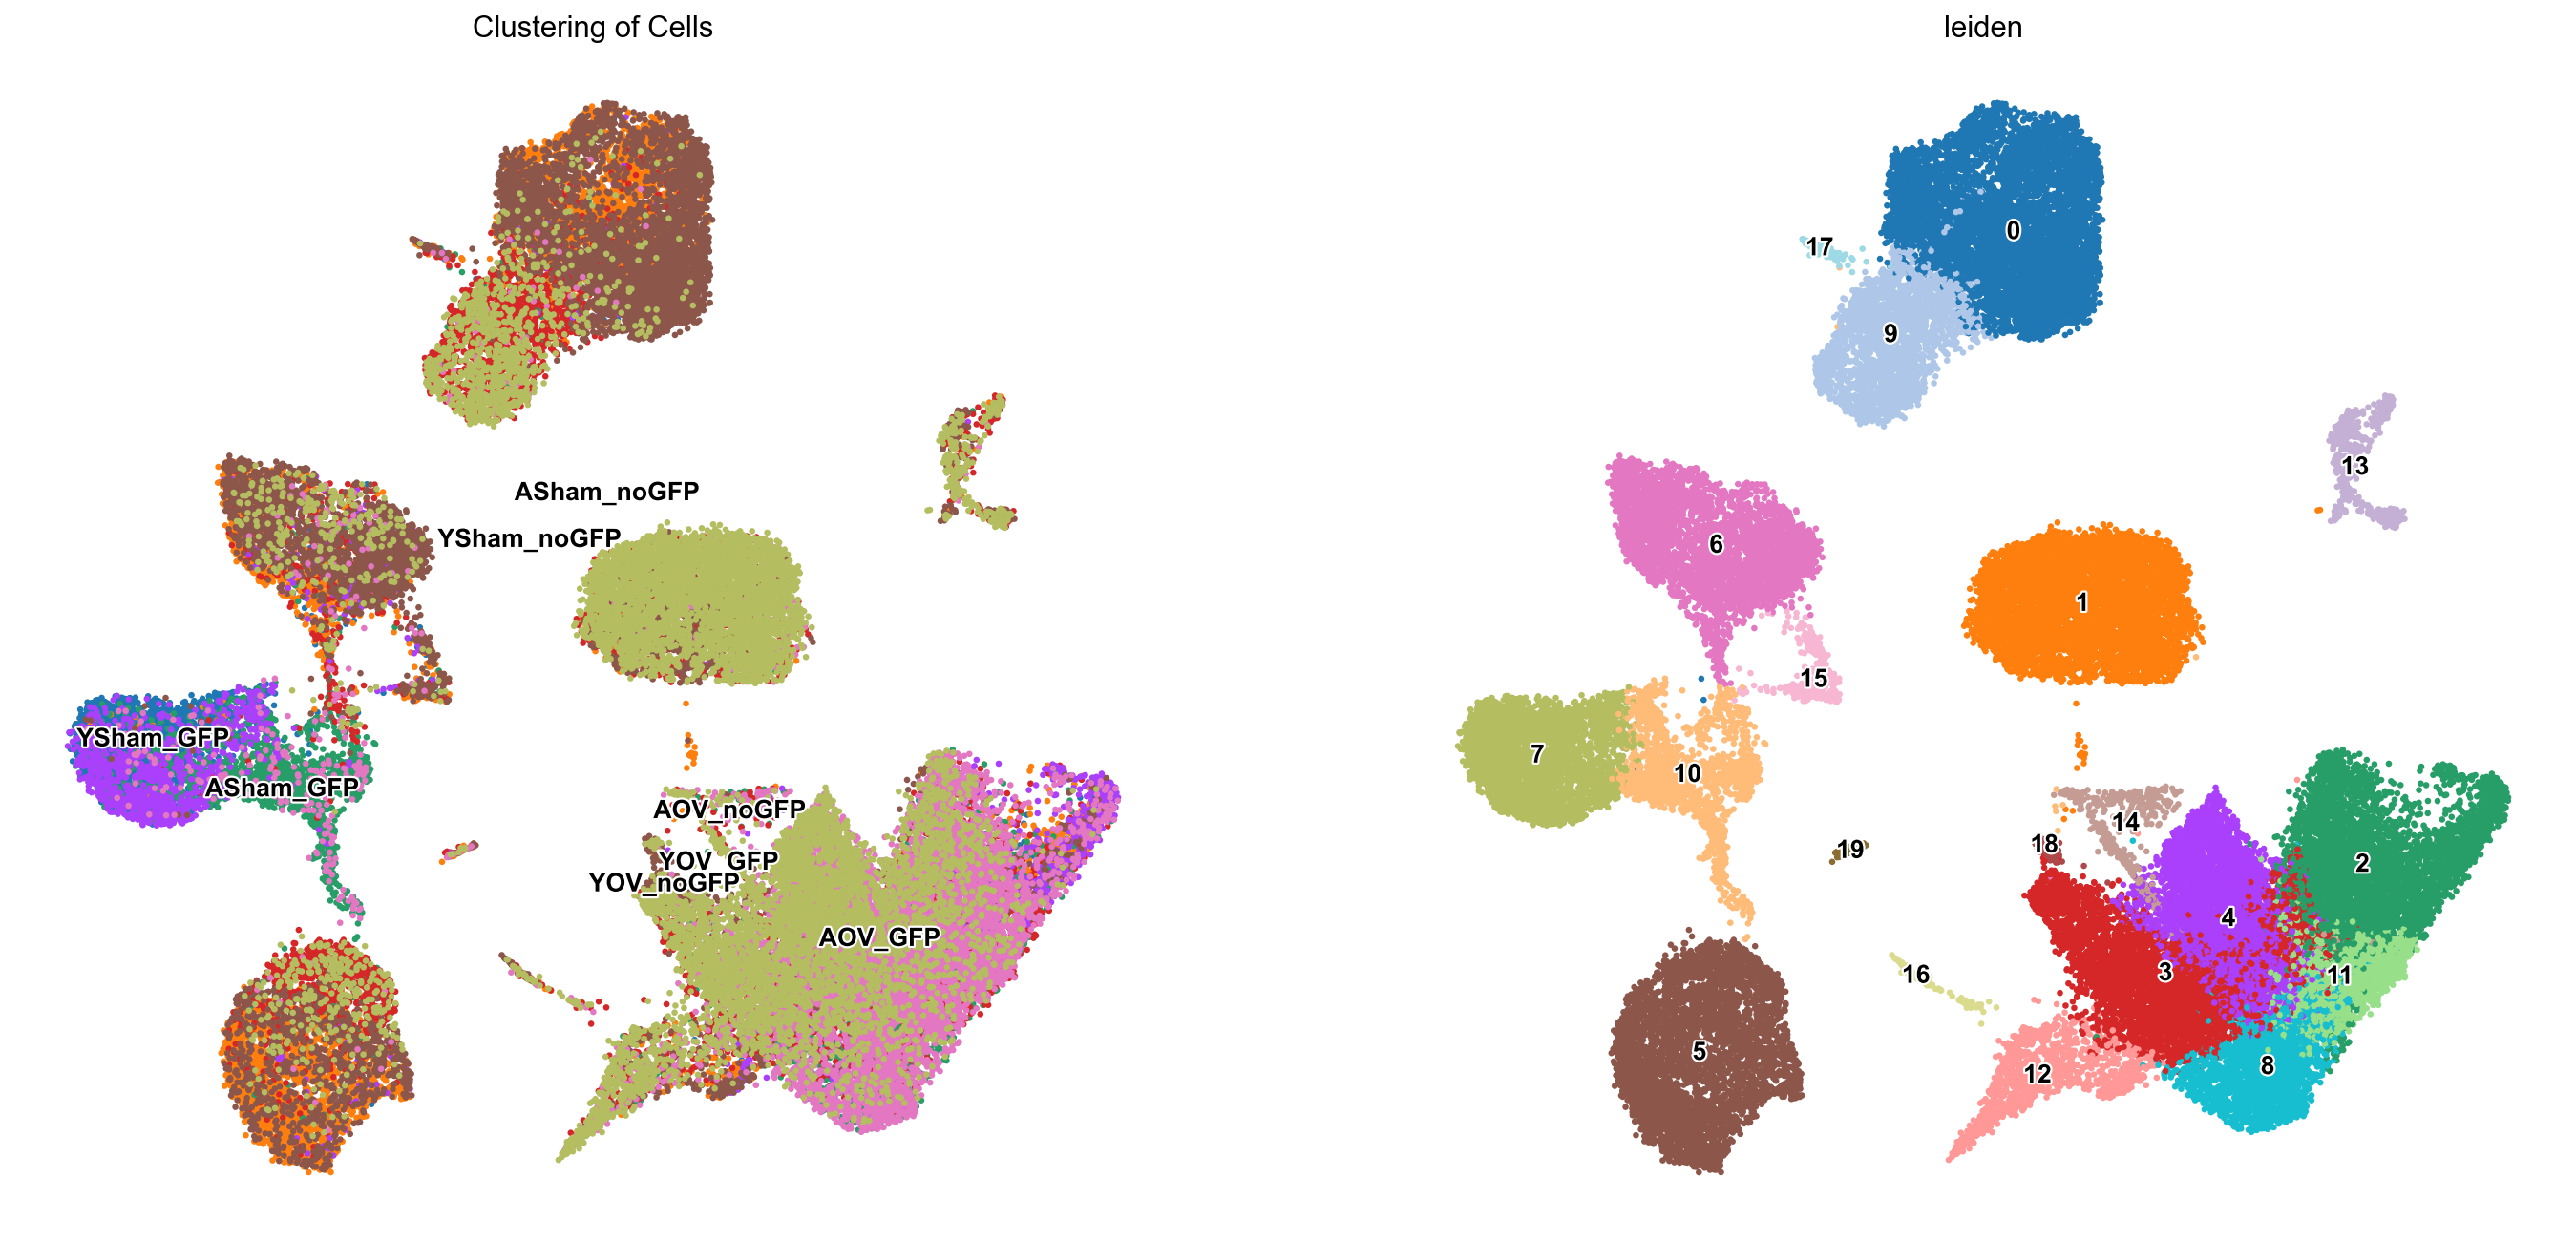

In [15]:
# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample', 'leiden'], legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot after integration sample and cell type10{img_tag}.png')
pl.show()

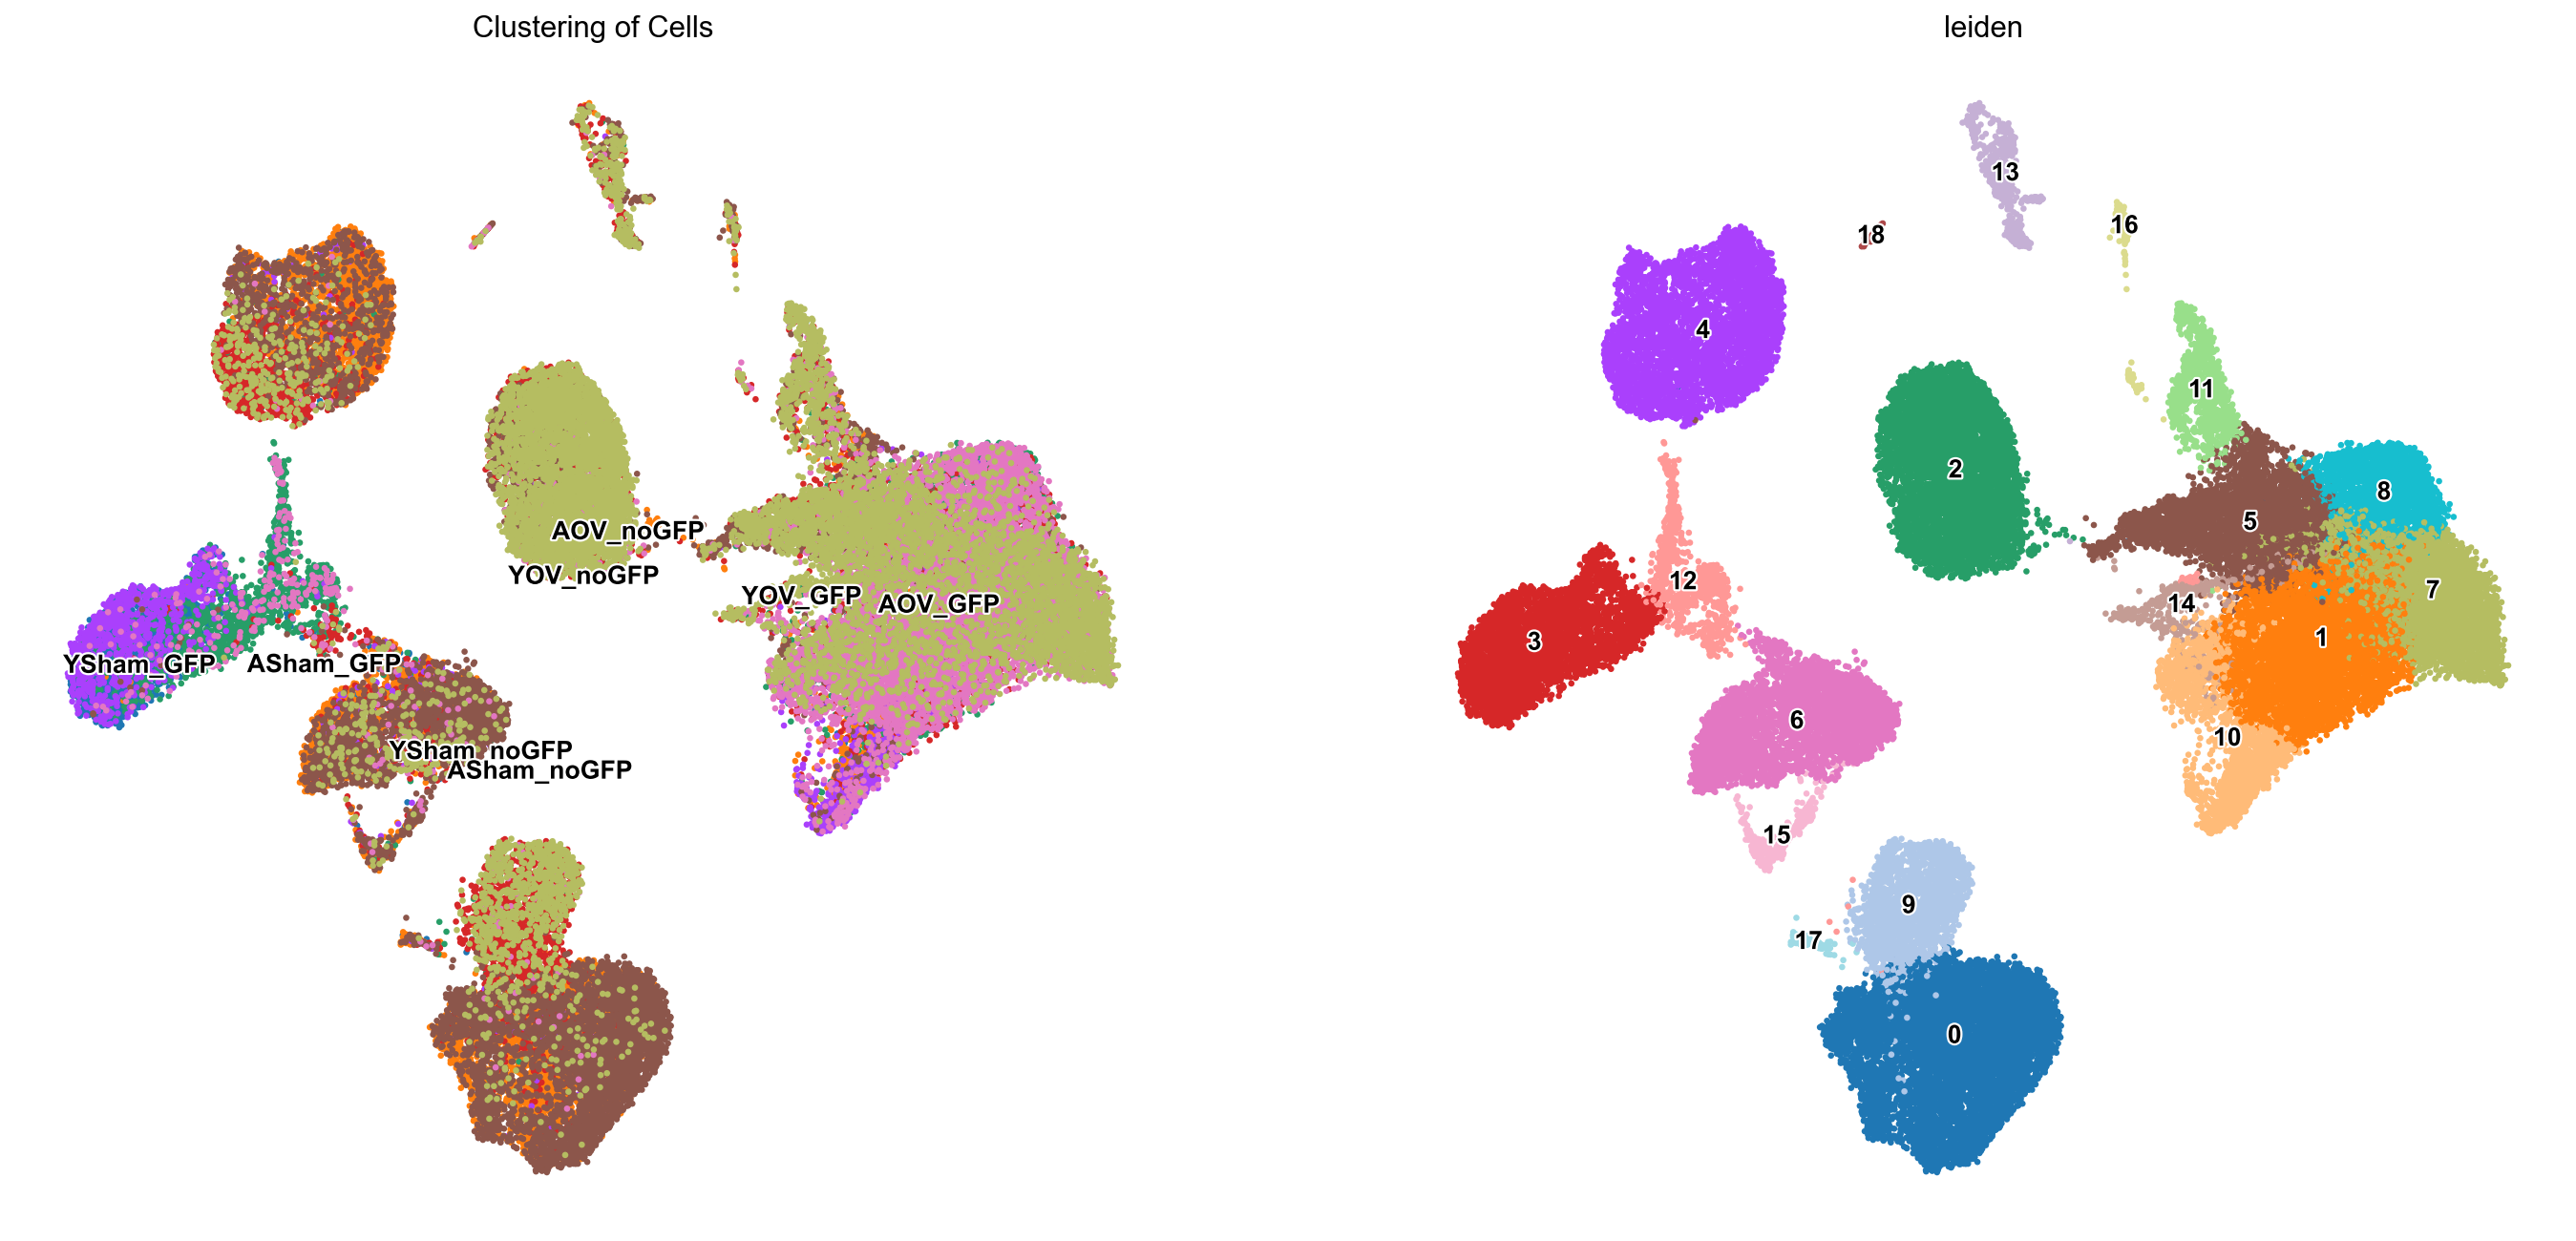

In [17]:
# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample', 'leiden'], legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot after integration sample and cell type10{img_tag}.png')
pl.show()

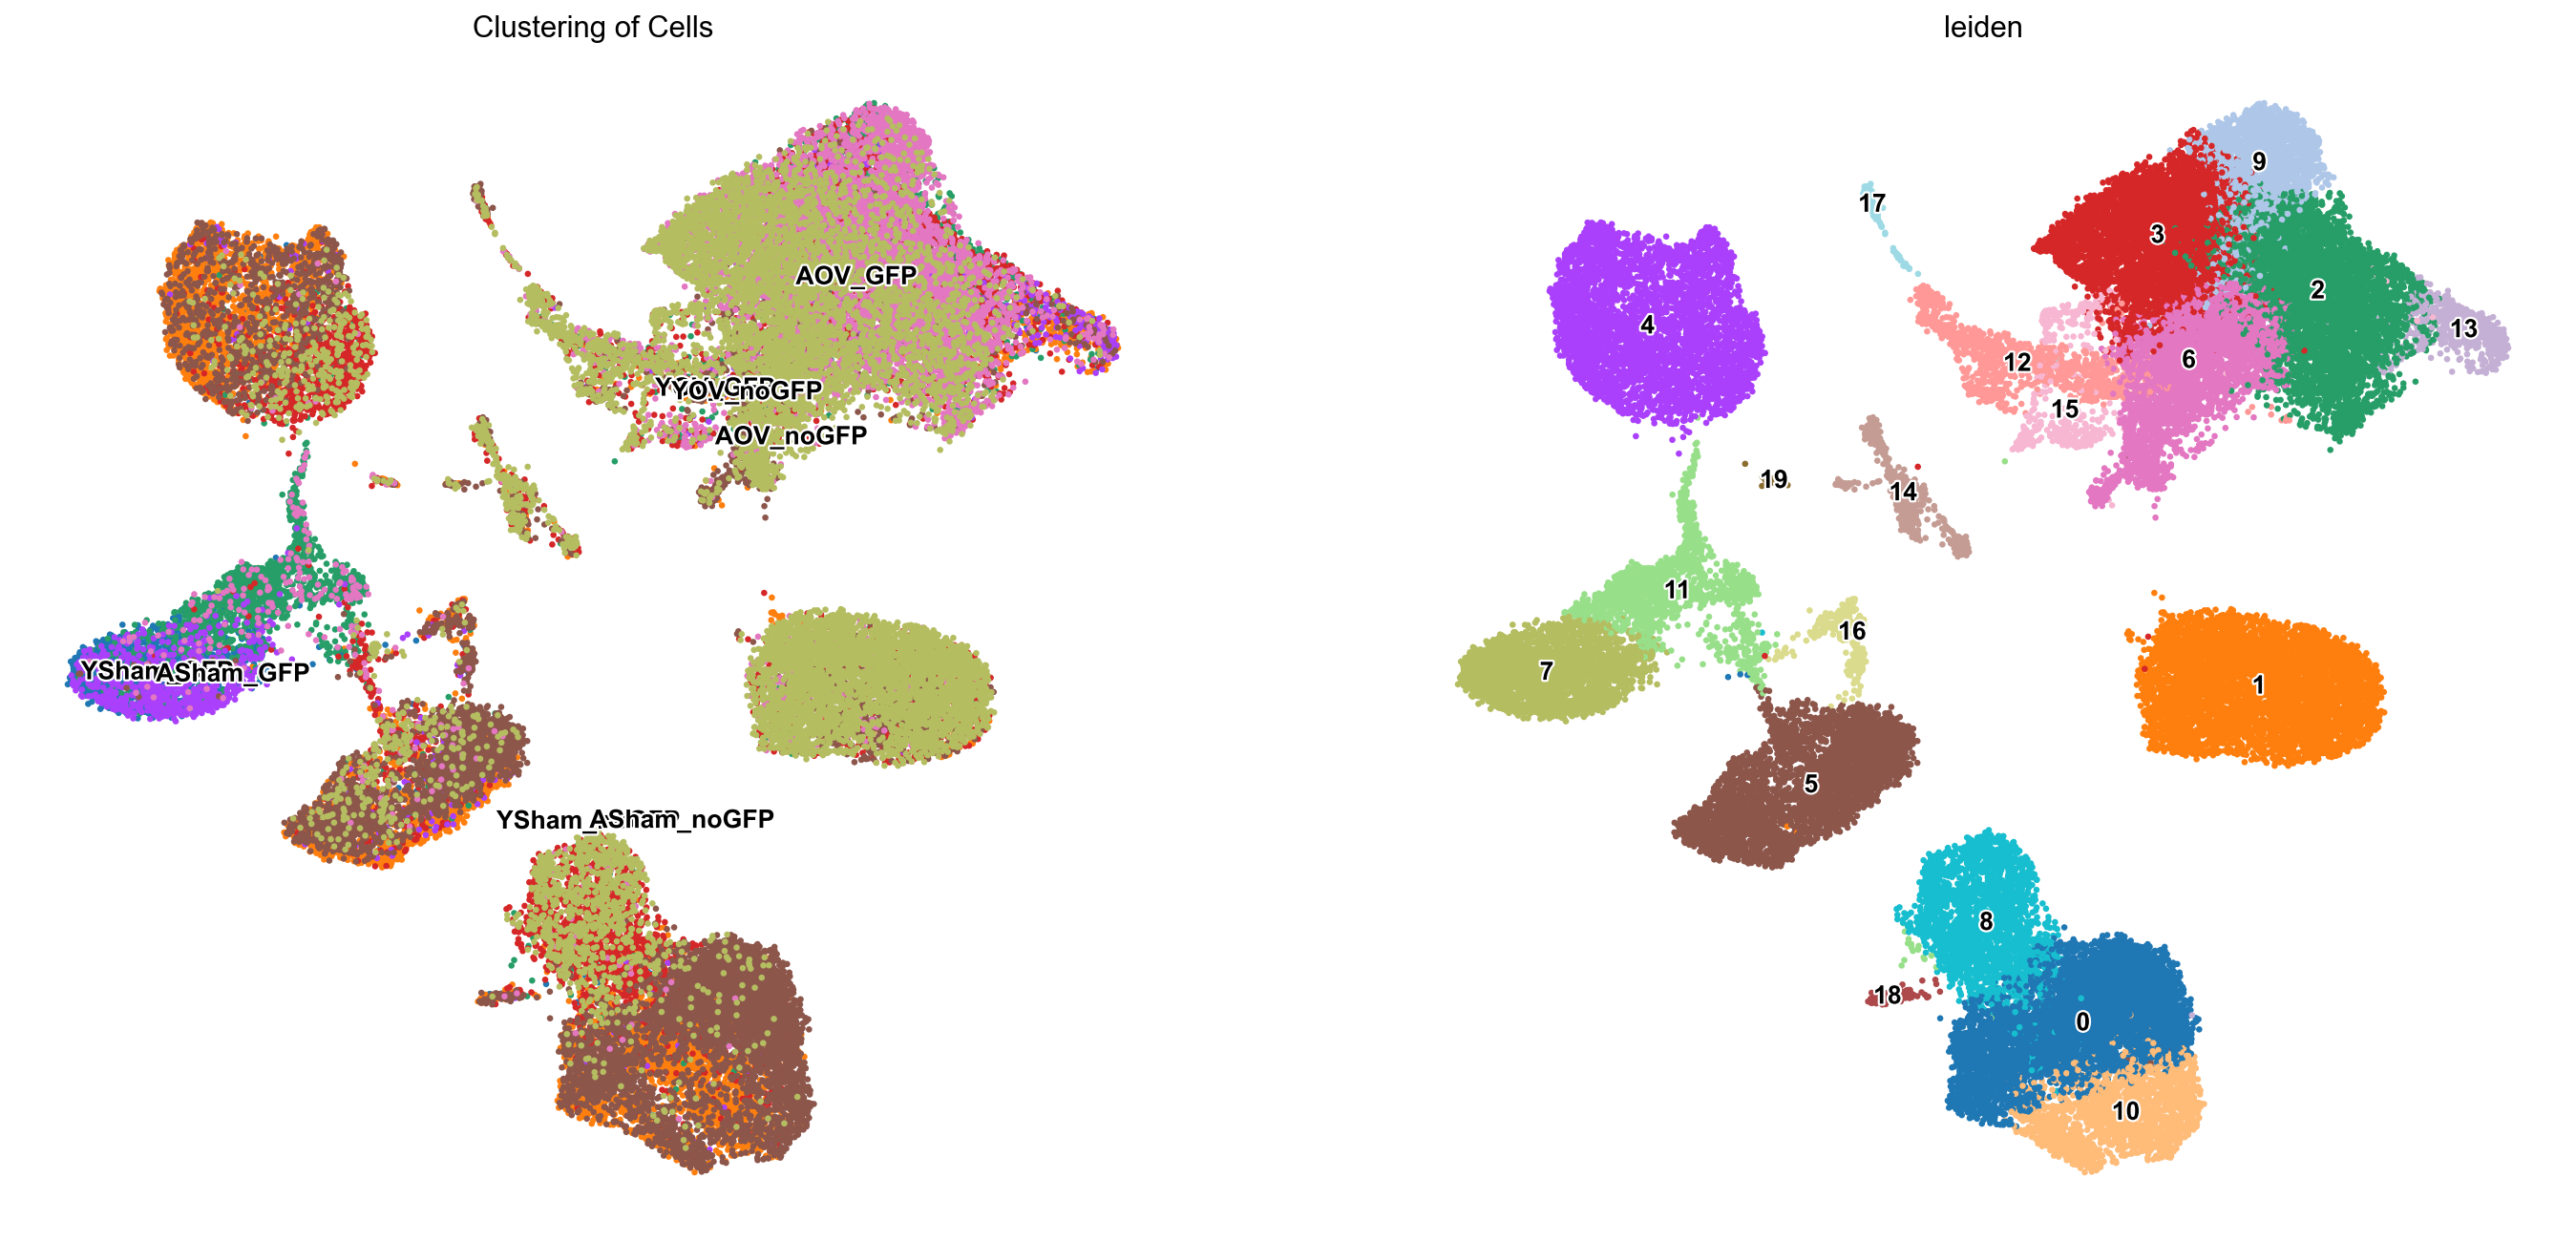

In [28]:
# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample', 'leiden'], legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot after integration sample and cell type{img_tag}.png')
pl.show()

In [29]:
adata.write('Harminted_data.h5ad')
adata_concat=adata.copy()

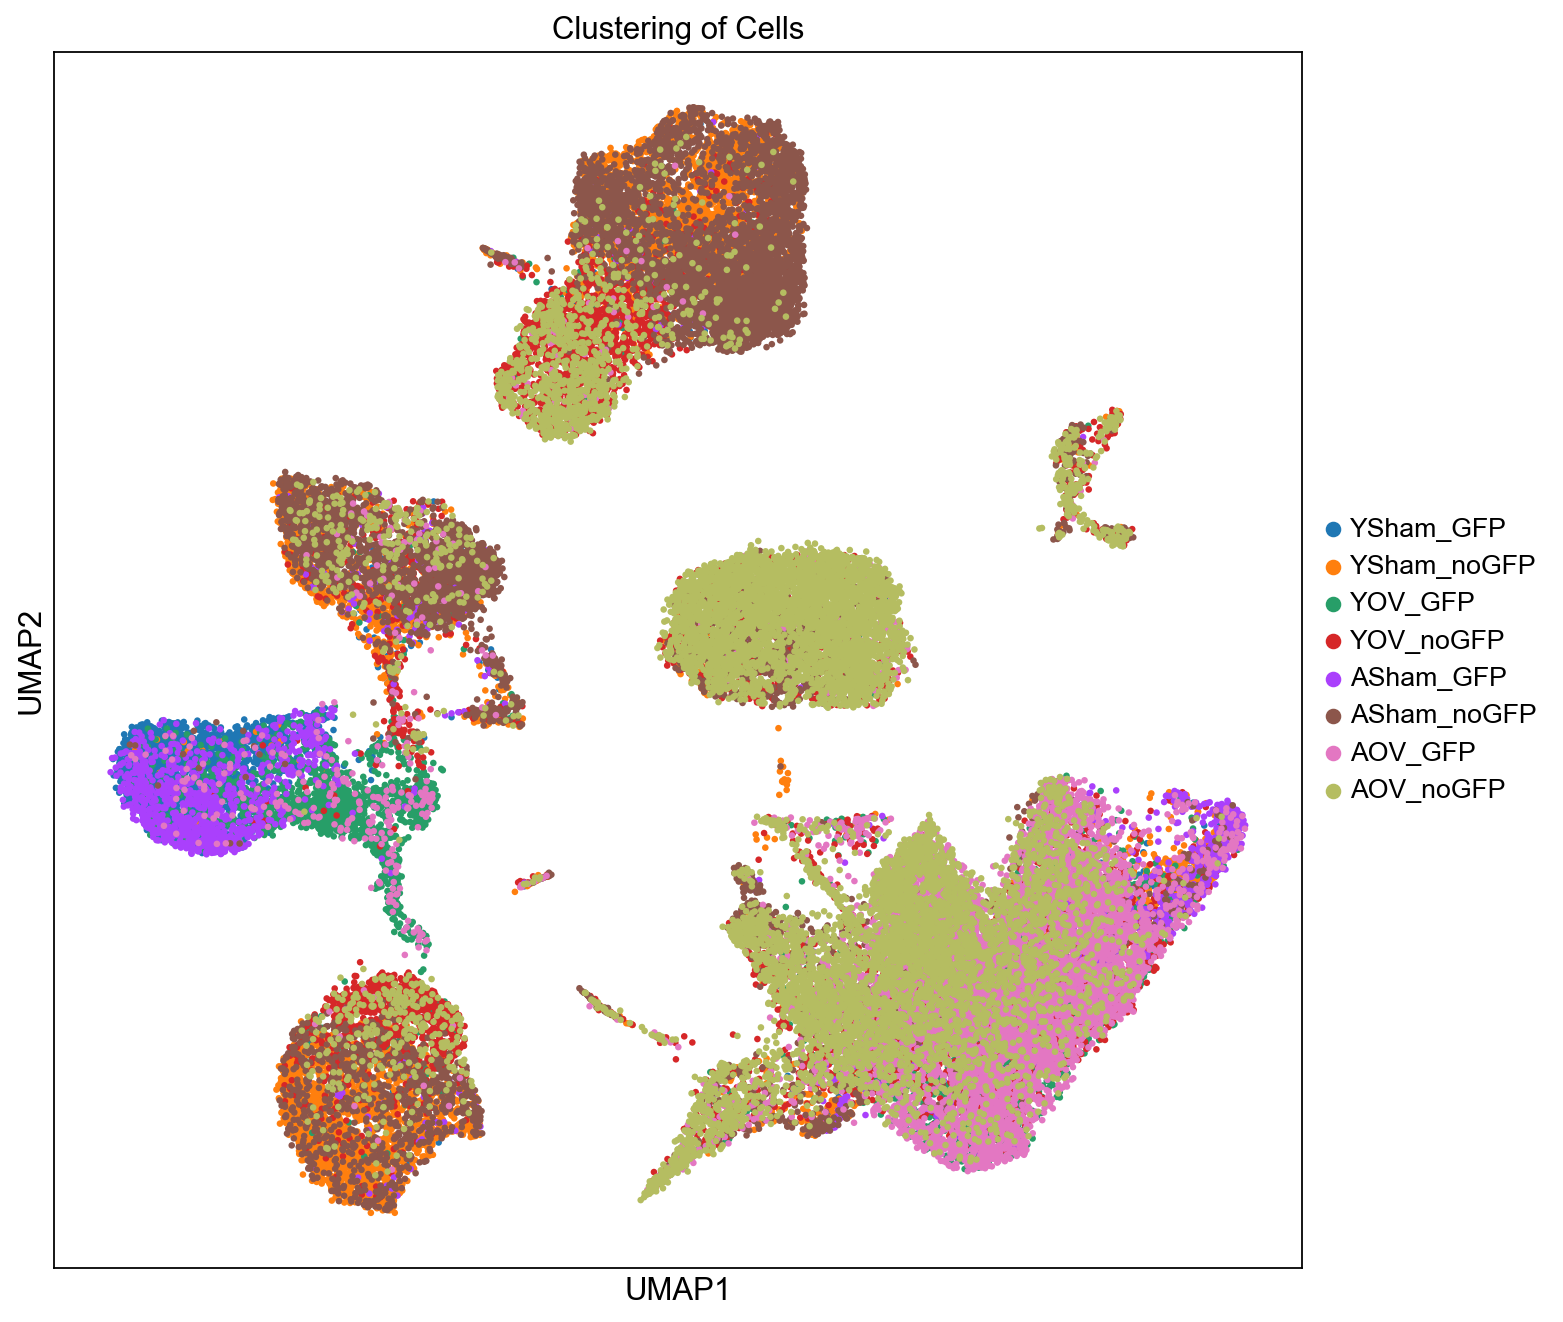

In [21]:

# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=35, title='Clustering of Cells', save=f'umap_plot after intesample1{img_tag}.png')
pl.show()

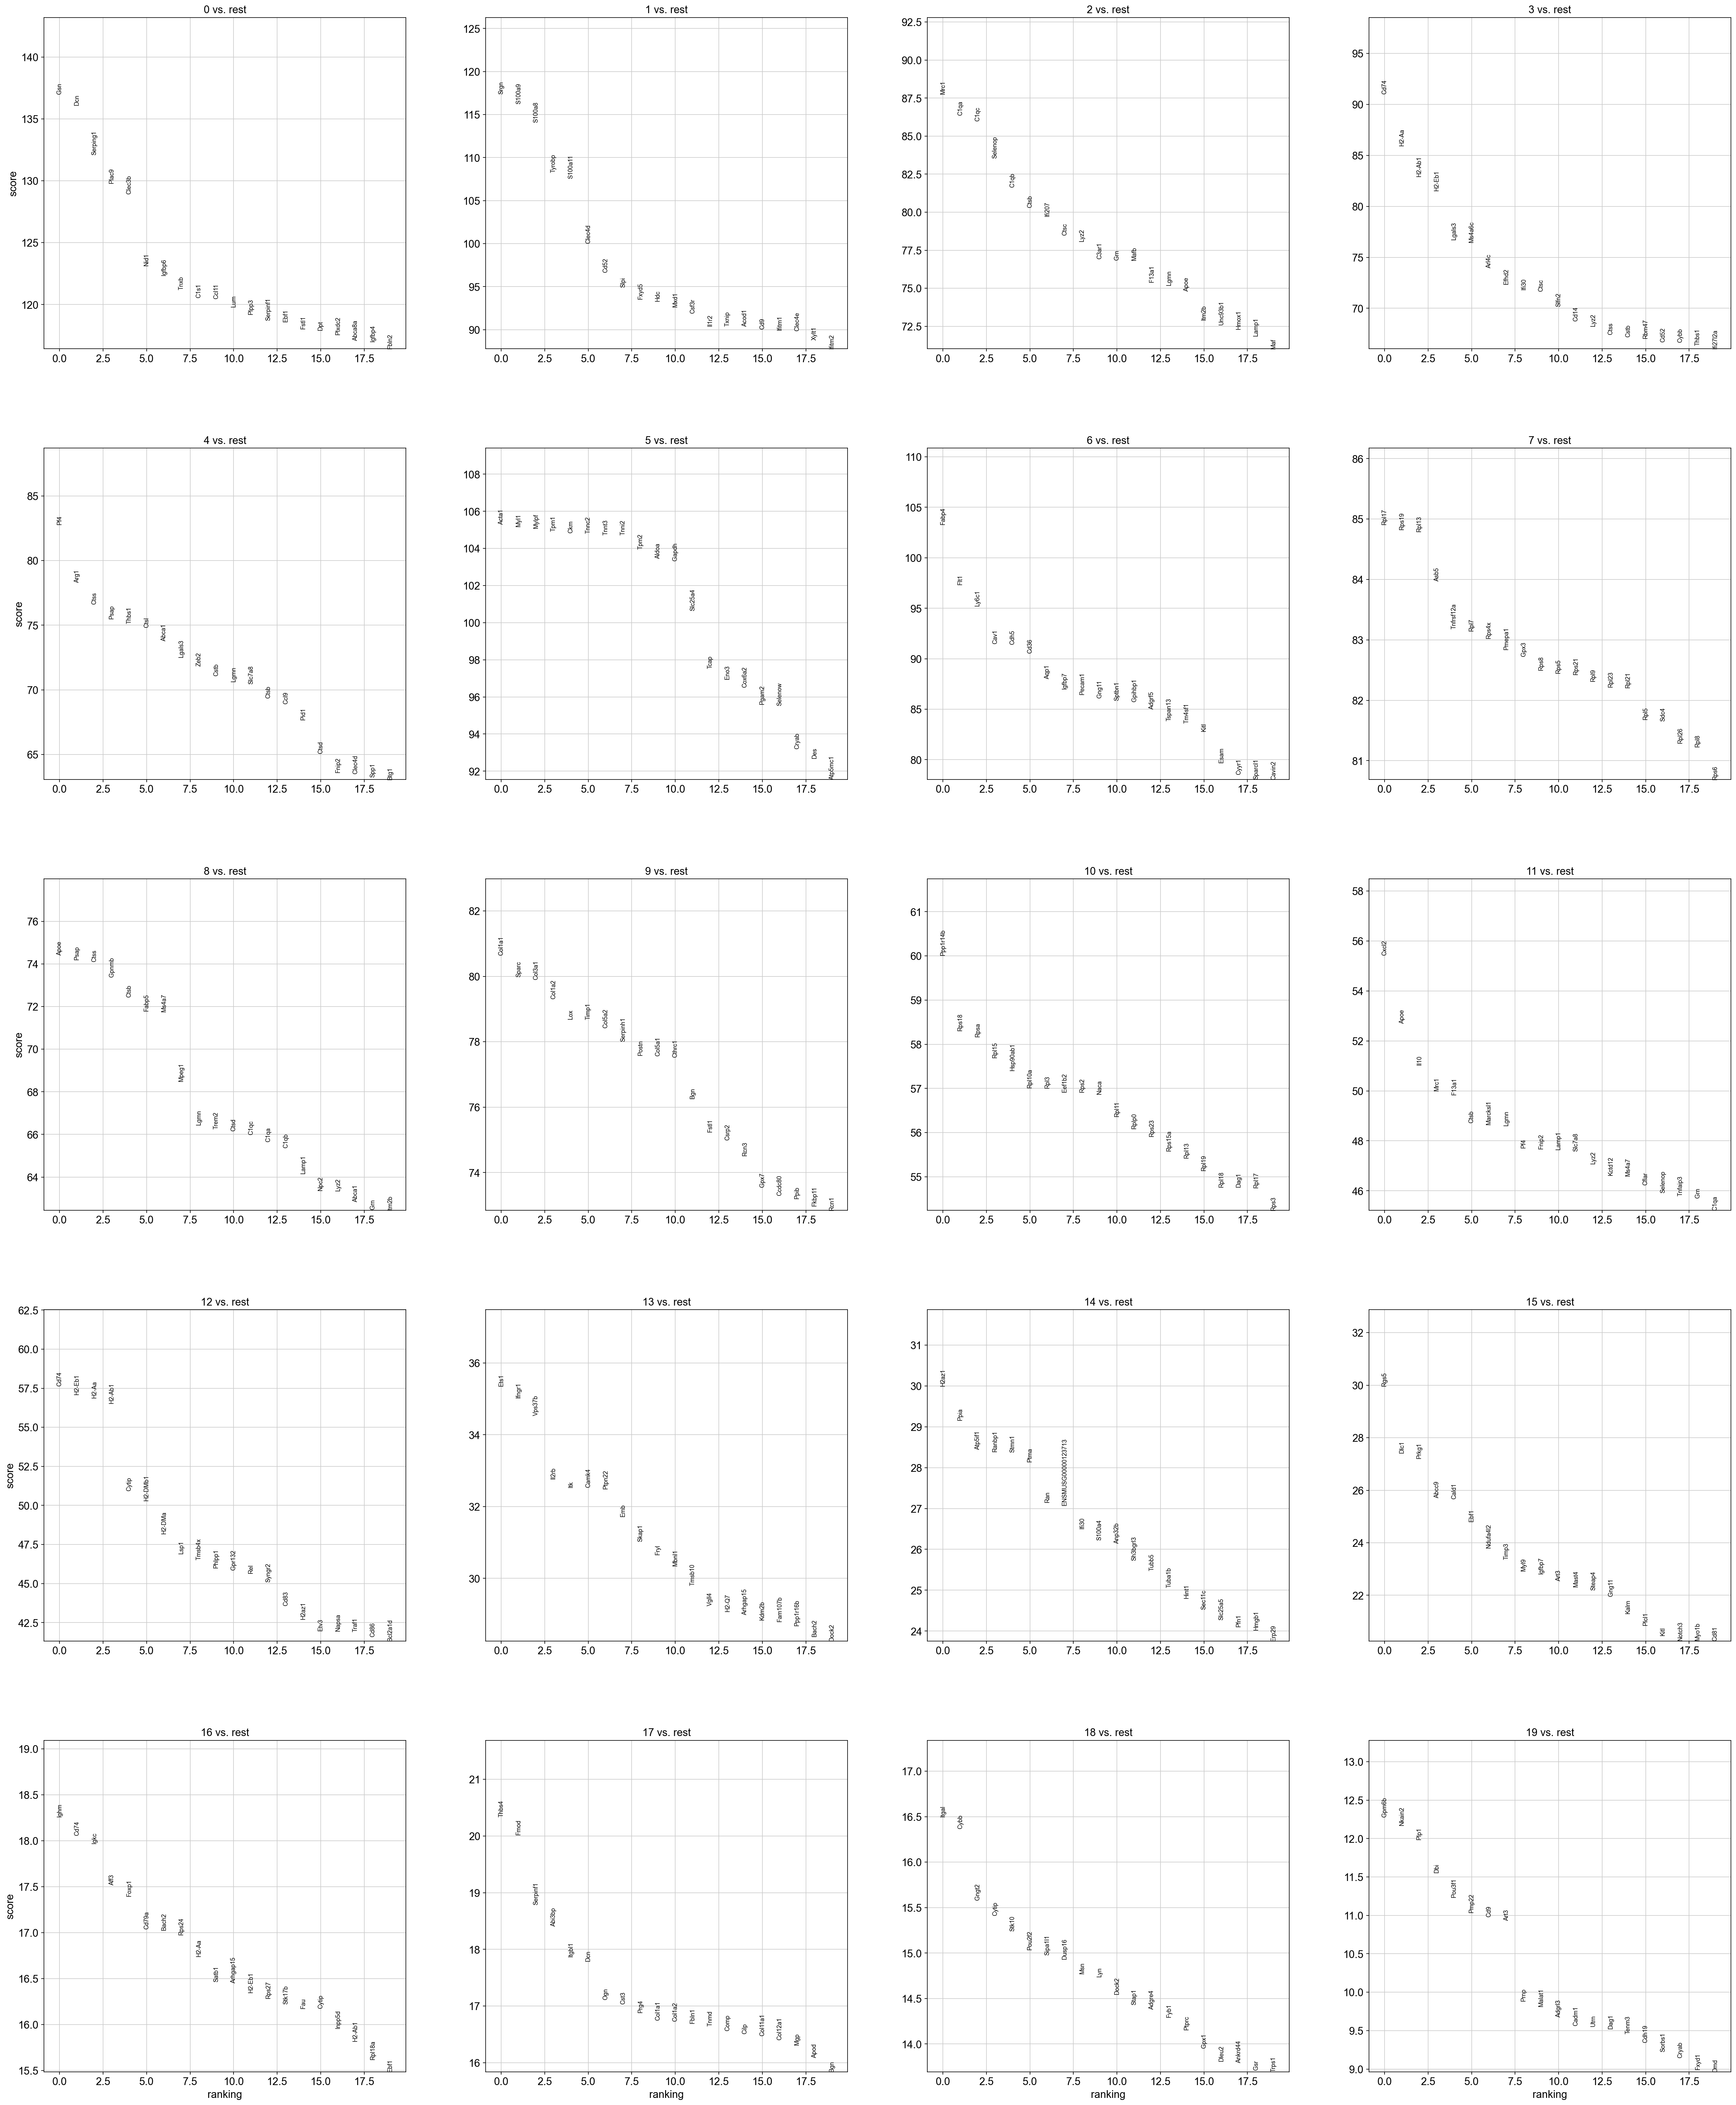

In [16]:
# Find marker genes for the refined clustering
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

# View top marker genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, save=f'rankgenese{img_tag}.png')

In [17]:
result=adata.uns['rank_genes_groups']
groups=result ['names'].dtype.names
df=pd.DataFrame(
    {group + '_' + key[:15]: result [key] [group]
     for group in groups for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [18]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group     names      scores  logfoldchanges     pvals  pvals_adj
0          0       Gsn  137.024612        6.965152  0.000000   0.000000
1          0       Dcn  136.102203        8.141979  0.000000   0.000000
2          0  Serping1  132.105316        5.768989  0.000000   0.000000
3          0     Plac9  129.808014        5.577077  0.000000   0.000000
4          0    Clec3b  128.924896        7.456772  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
726176    19   Ankrd28    3.289383        1.314819  0.001004   0.047942
726177    19       Ust    3.282121        1.838117  0.001030   0.048888
726178    19     Creb5    3.281612        1.254073  0.001032   0.048916
726179    19    Zfand6    3.280712        1.211032  0.001035   0.049011
726180    19     Ssbp2    3.277788        1.907873  0.001046   0.049400

[50114 rows x 6 columns]

In [19]:
# Create a DataFrame from the 'markers' variable
markers_df = pd.DataFrame(markers)

# Define the full path including the file name and extension
csv_file_path = 'P:/Tolulope/Manuscript/Yuan Analysis/markers_output.csv'

# Save the DataFrame to a CSV file
markers_df.to_csv(csv_file_path, index=False)

print(f"Output saved to {csv_file_path}")

Output saved to P:/Tolulope/Manuscript/Yuan Analysis/markers_output.csv


In [45]:
markers[markers.names =='']  

group names     scores  logfoldchanges          pvals      pvals_adj
76746      2  Cd74  31.054522        1.520537  9.912763e-212  9.442587e-210
114594     3  Cd74  91.033234        5.462891   0.000000e+00   0.000000e+00
306249     8  Cd74  22.738668        1.299897  1.857776e-114  9.842348e-113
458376    12  Cd74  57.633289        6.816524   0.000000e+00   0.000000e+00
611169    16  Cd74  18.058006        5.718120   6.824274e-73   1.303368e-68

In [46]:
cell_type = {
    "0": "Fibroadipogenic cells",
    "1": "Neutrophils",
    "2": "M2-like macrophages I",
    "3": "Residence Macrophages/APC",
    "4": "Monocytes/Macrophages",
    "5": "Mature skeletal muscle",
    "6": "Endothelial cells",
    "7": "MuSCs",
    "8": "Lipid-Laden Macrophages",
    "9": "Myofibroblasts",
    "10": "Fusion-Competent Myoblasts",
    "11": "M2-like macrophages II",
    "12": "Dendritic cells",
    "13": "T cells/NKCs",
    "14": "Proliferation",
    "15": "Pericytes",  
    "16": "Bcells",
    "17": "Tenocytes",
    "18": "Macrophages",
    "19": "Schwann cells",
     
        
}
# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden'].map(cell_type)


In [18]:
cell_type = {
    "0": "Fibroadipogenic cells I",
    "1": "Neutrophils",
    "2": "M2-like macrophages II",
    "3": "Monocytes/Macrophages",
    "4": "Mature skeletal muscle",
    "5": "Endothelial cells",
    "6": "Residence Macrophages/APC",
    "7": "MuSCs",
    "8": "Myofibroblasts",
    "9": "Lipid-Laden Macrophages",
    "10": "Fibroadipogenic cells I",
    "11": "Fusion-Competent Myoblasts",
    "12": "Dendritic cells",
    "13": "M2-like macrophages I",
    "14": "T cells/NKCs",
    "15": "Proliferation",
    "16": "Pericytes",  
    "17":  "Bcells",
    "18": "Tenocytes",
    "19": "Schwann cells",
     
        
}
# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden'].map(cell_type)


In [ ]:
cell_type = {
    "0": "Neutrophils",
    "1": "Lipid-Laden Macrophages",
    "2": "Fibroadipogenic cells I",
    "3": "Mature skeletal muscle",
    "4": "Residence Macrophages/APC",
    "5": "M2-like macrophages",
    "6": "MuSCs",
    "7": "Endothelial cells I",
    "8": "Endothelial cells II",
    "9": "Proliferation",
    "10": "Fibroadipogenic cells I", 
    "11": "Monocytes/Macrophages", "Fusion-Competent Myoblasts"Mymx
    "12": "Dendritic cells",
    "13": "T cells/NKCs",
    "14": "Interferons",
    "15": "Pericytes", 
    "16":  "Bcells",
    "17": "Tenocyte",
    "18": "Schwann cells",
    "19": "Schwann cells",
     Mymx
        
}
# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden'].map(cell_type)


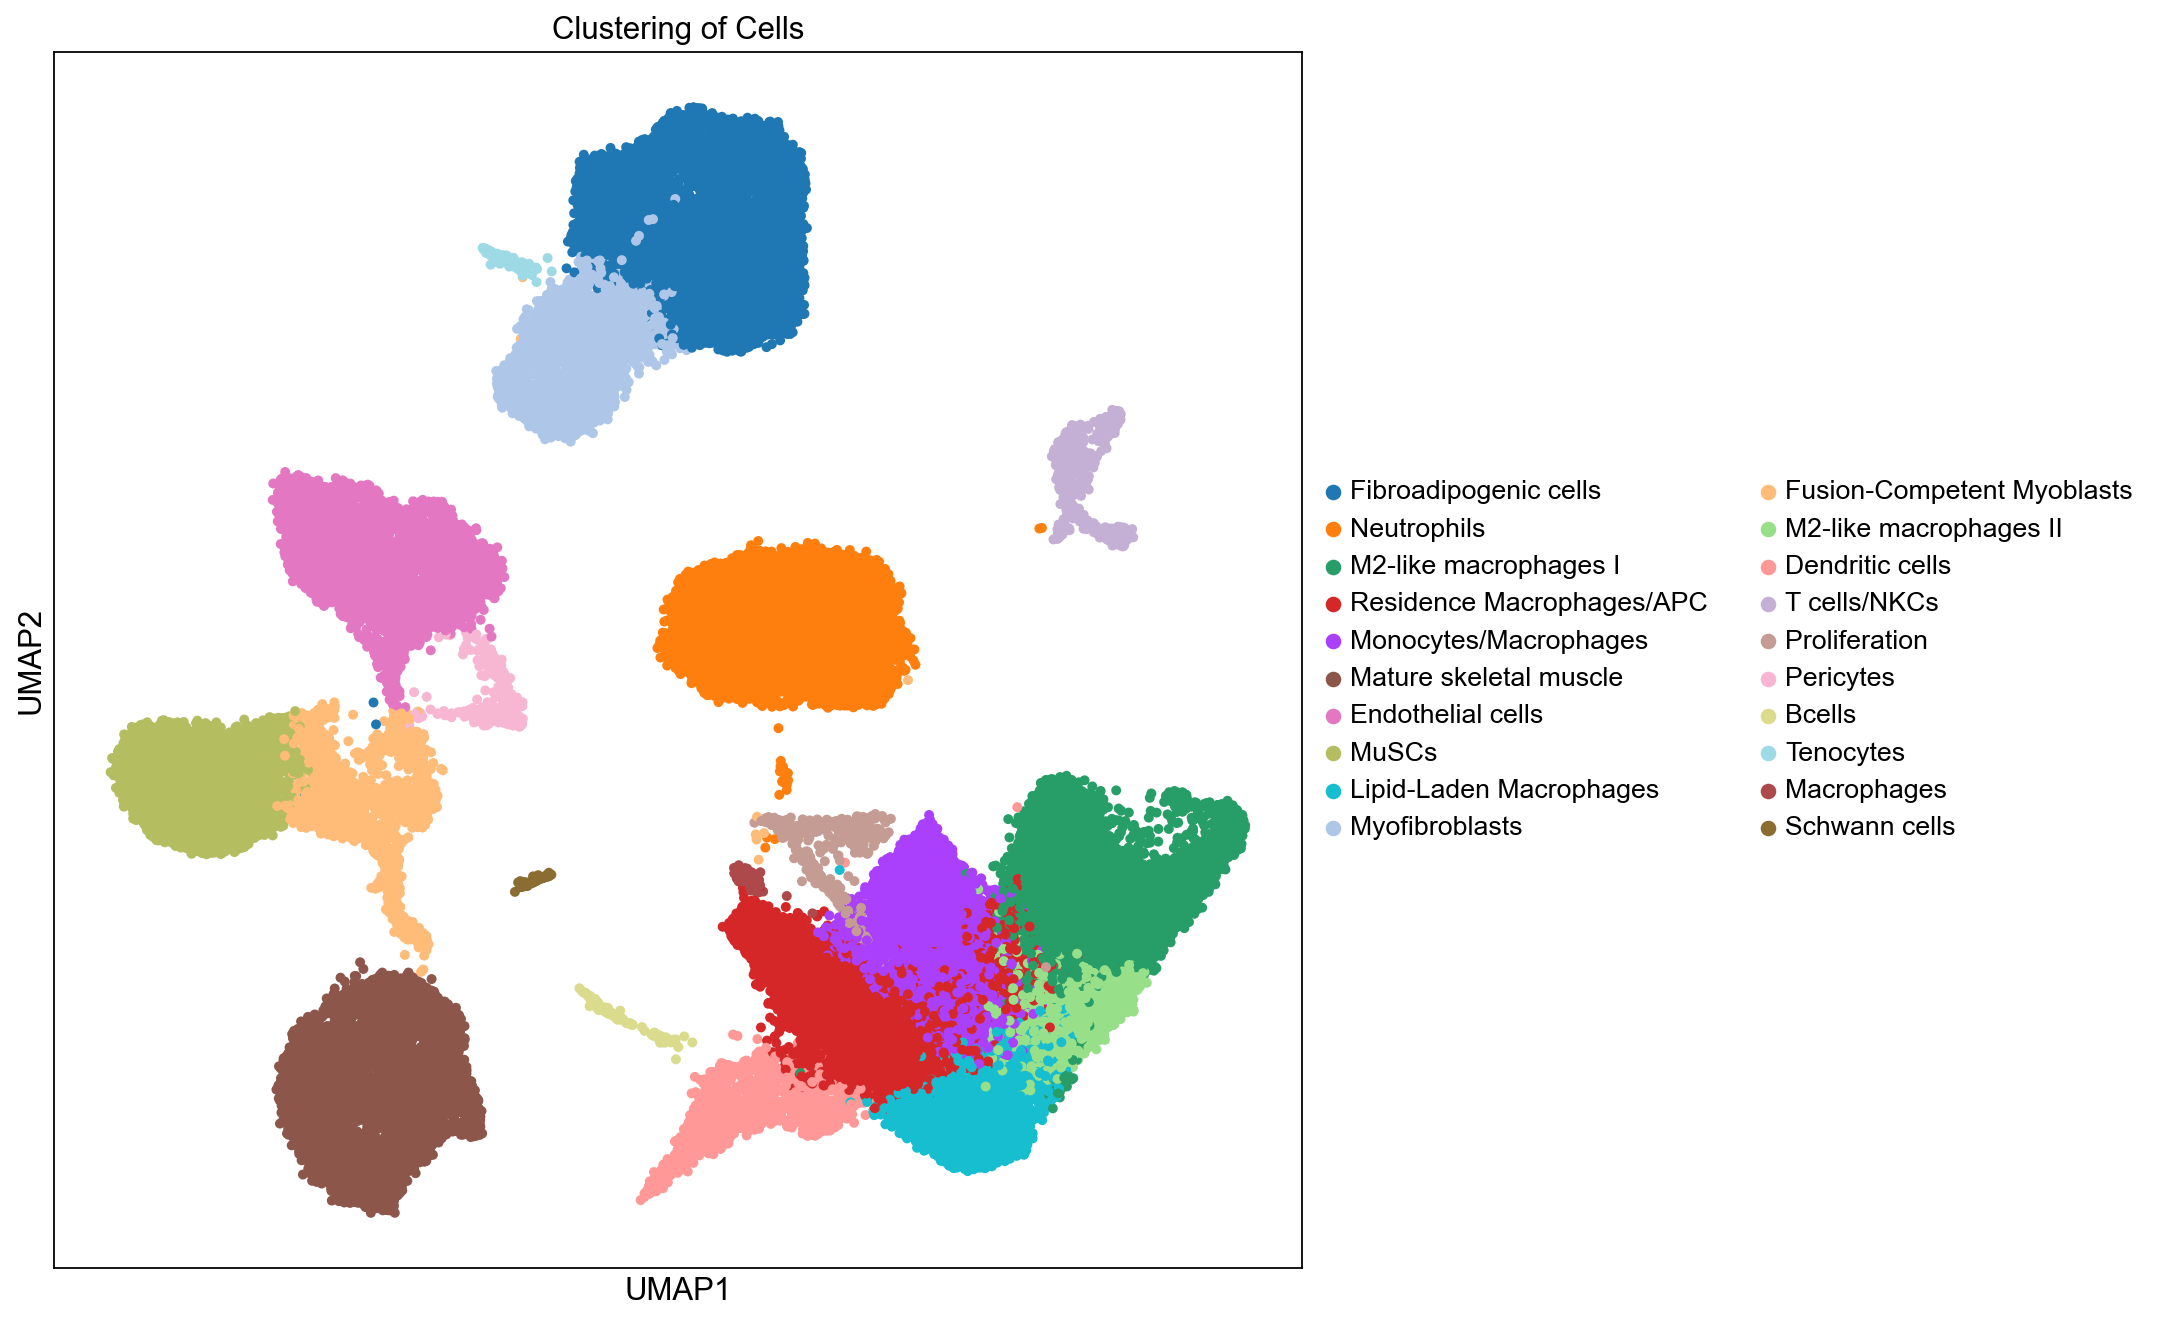

In [47]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [48]:
# Define the mapping function
def map_condition(x):
    if 'YSham_GFP' in x:
        return 'YSham-GFP'
    elif 'YSham_noGFP' in x:
        return 'YSham-noGFP'
    elif 'YOV_GFP' in x:
        return 'YOV-GFP'
    elif 'YOV_noGFP' in x:
        return 'YOV-noGFP'
    elif 'ASham_GFP' in x:
        return 'ASham-GFP'
    elif 'ASham_noGFP' in x:
        return 'ASham-noGFP'
    elif 'AOV_GFP' in x:
        return 'AOV-GFP'
    else:
        return 'AOV-noGFP'

# Apply mapping
adata.obs['condition'] = adata.obs.batch.map(map_condition)


<Figure size 1120x800 with 0 Axes>

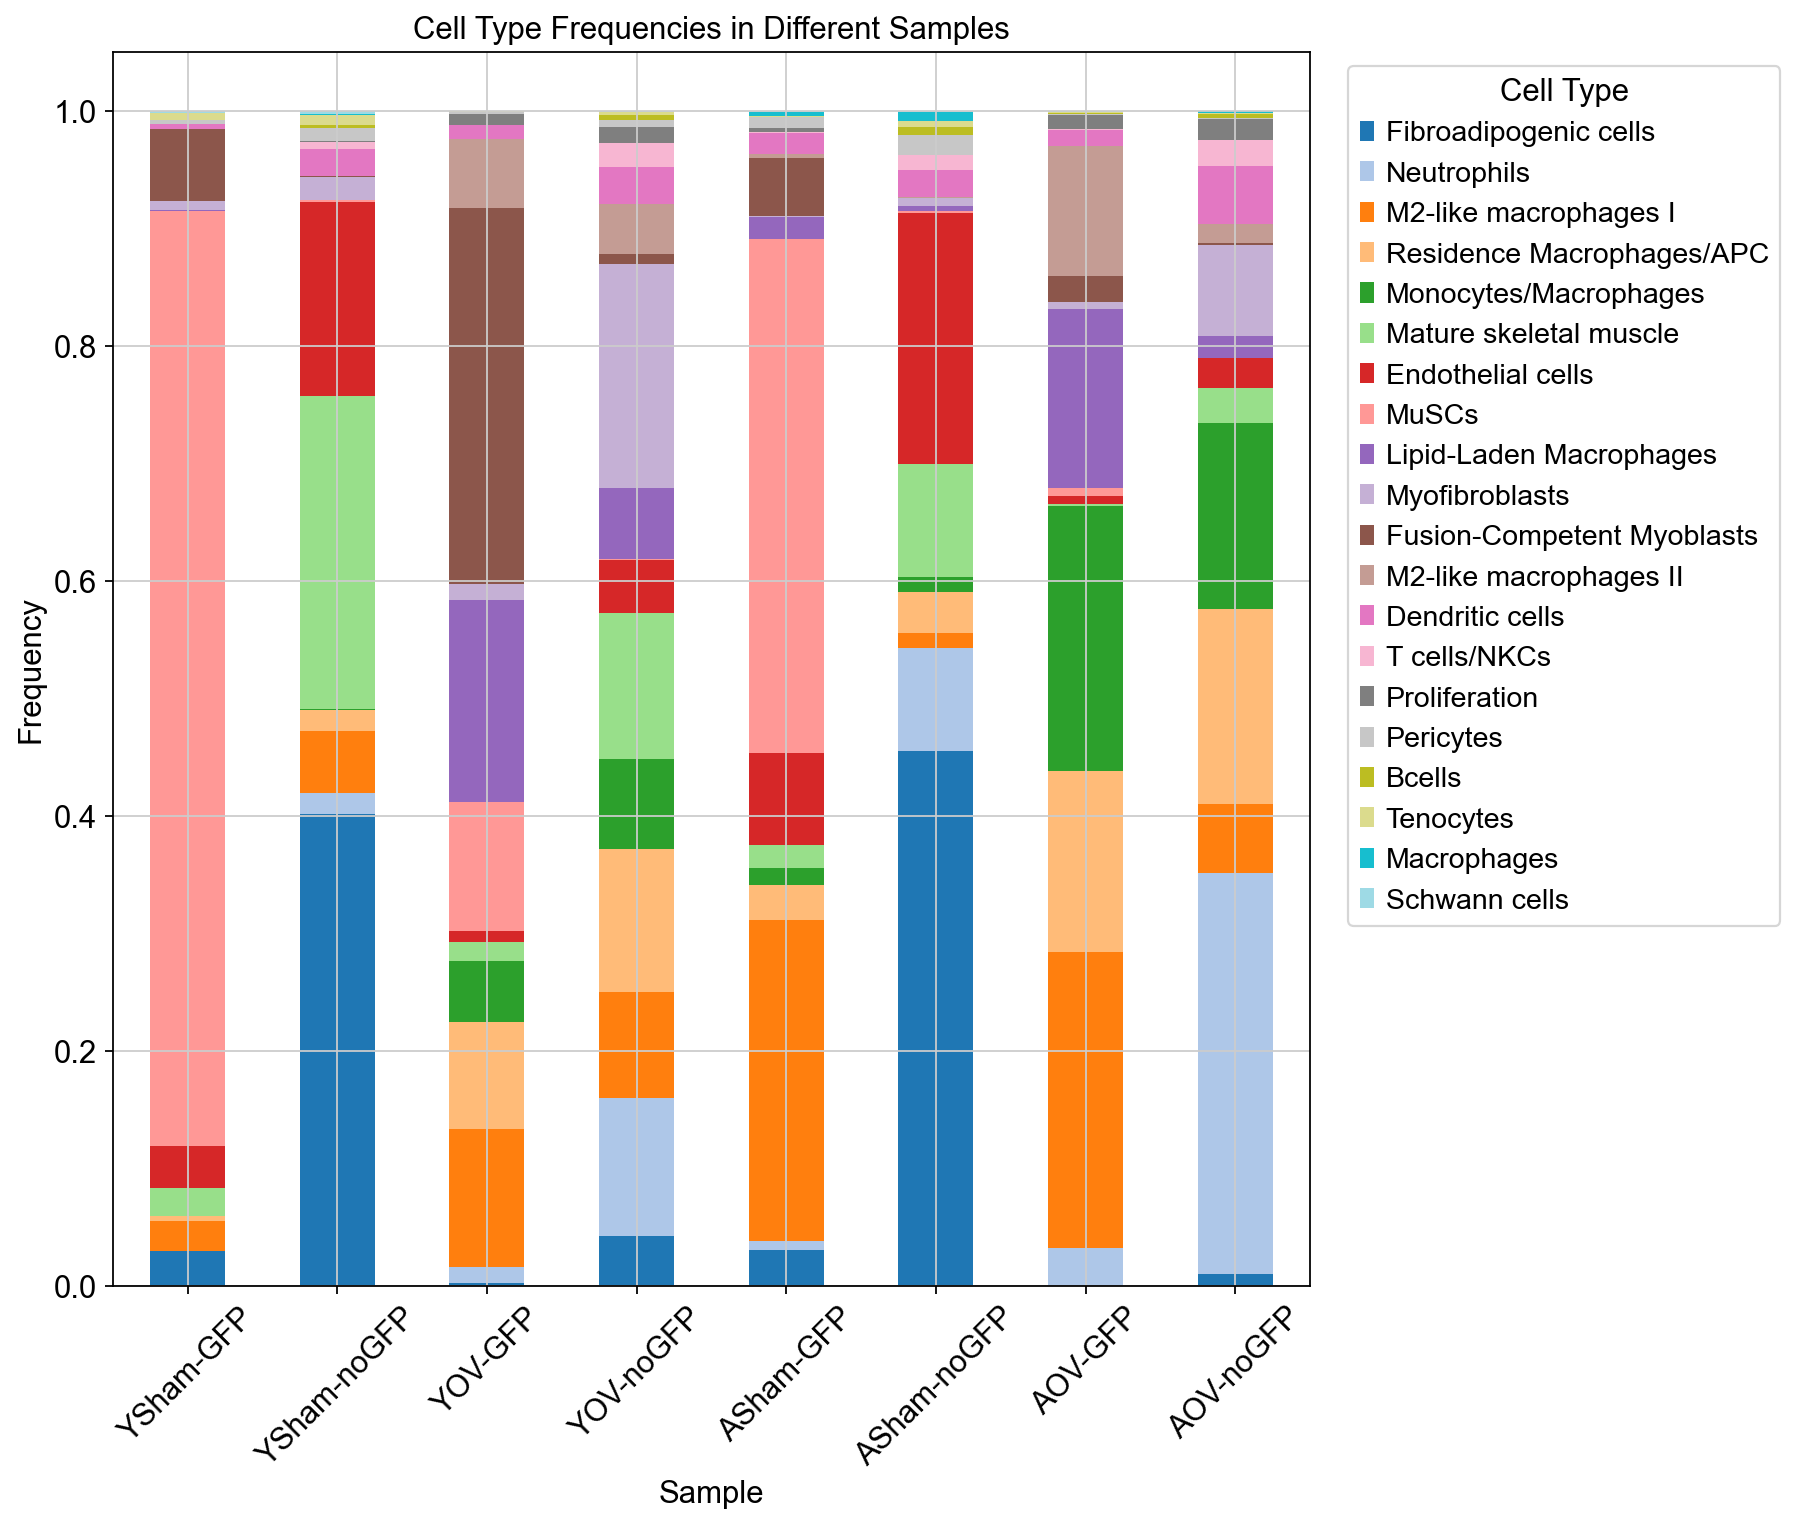

In [49]:
# Grouping by condition and cell type to get cell type counts
cell_type_counts = adata.obs.groupby(['condition', 'cell type']).size().reset_index(name='count')

# Adding total cell counts for each condition
total_cells = adata.obs.groupby('condition').size().reset_index(name='total_cells')
total_cells_dict = dict(zip(total_cells.condition, total_cells.total_cells))
cell_type_counts['total_cells'] = cell_type_counts['condition'].map(total_cells_dict)

# Ensure the total_cells column is numeric
cell_type_counts['total_cells'] = cell_type_counts['total_cells'].astype(int)

# Calculating the frequency of each cell type in each condition
cell_type_counts['frequency'] = cell_type_counts['count'] / cell_type_counts['total_cells']

# Set the figure size larger to accommodate longer labels
pl.figure(figsize=(14, 10))

# Define the order of samples in the plot
sample_order = ['YSham-GFP', 'YSham-noGFP', 'YOV-GFP', 'YOV-noGFP', 'ASham-GFP', 'ASham-noGFP', 'AOV-GFP', 'AOV-noGFP']

# Ensure 'condition' column is categorized to maintain the specified order
cell_type_counts['condition'] = pd.Categorical(cell_type_counts['condition'], categories=sample_order, ordered=True)

# Pivot the DataFrame for a stacked bar plot
stacked_data = cell_type_counts.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Create a stacked bar plot with distinct colors for each cell type
ax = stacked_data.plot(kind='bar', stacked=True, colormap='tab20')

# Set plot properties
pl.xlabel('Sample')
pl.ylabel('Frequency')
pl.title('Cell Type Frequencies in Different Samples')
pl.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the legend

# Rotate x-axis labels
pl.xticks(rotation=45)

# Move the legend to the right side
pl.legend(title='Cell Type', bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
pl.show()

In [50]:
from scipy.sparse import issparse  # Import issparse from scipy.sparse

# Ensure data is in 2D format (dense matrix if sparse)
if issparse(adata.X):
    adata.X = adata.X.toarray()  # Convert to dense if it's sparse

# Check the shape before saving
print(f"Shape of X before saving: {adata.X.shape}")

Shape of X before saving: (49285, 38198)


In [51]:
adata.write_h5ad('integrated celltype use51007.h5ad')

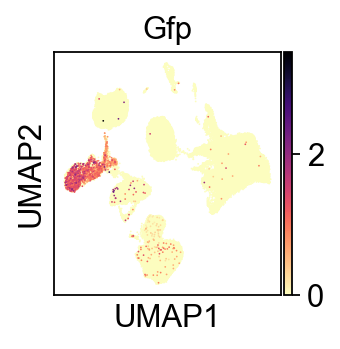

In [48]:
# Set figure size
pl.rcParams['figure.figsize'] = 2, 2

# Create the UMAP plot and save it
sc.pl.umap(adata_concat, color='Gfp', color_map='magma_r', save=f"umap_Gfp_{img_tag}.png")

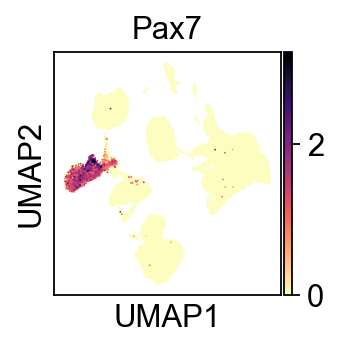

In [49]:
# Set figure size
pl.rcParams['figure.figsize'] = 2, 2

# Create the UMAP plot and save it
sc.pl.umap(adata_concat, color='Pax7', color_map='magma_r', save=f"umap_Pax7_{img_tag}.png")

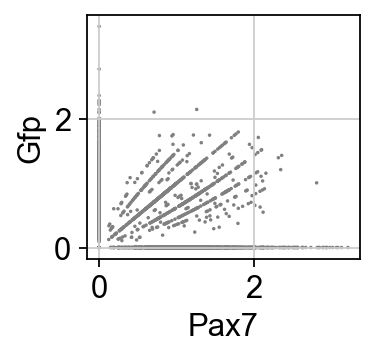

In [50]:
# Set figure size
pl.rcParams['figure.figsize'] = 3, 2

# Scatter plot of Pax7 vs Gfp and save it
sc.pl.scatter(adata_concat, x="Pax7", y="Gfp", size=10, save=f"umap_correlation_{img_tag}.png")


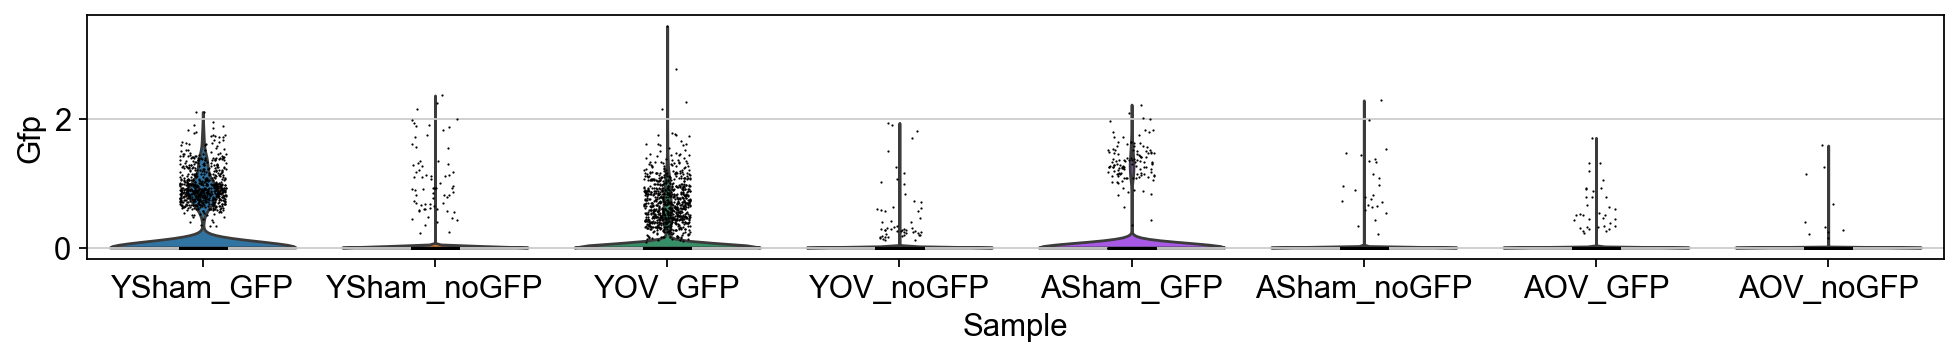

In [51]:
# Set figure size
pl.rcParams['figure.figsize'] = 12, 2

sc.pl.violin(adata, "Gfp", "Sample", save=f"umap_correlation_{img_tag}.png")

In [49]:

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")
adata = sc.read("Harminted_data.h5ad")

In [52]:
adata_concat=adata.copy()

In [53]:
# Now, check the raw attribute of the concatenated data
print(adata_concat.raw)  # Print the raw object
print(adata_concat.raw.var.shape)  # Print the shape of raw gene data


Raw AnnData with n_obs × n_vars = 49285 × 32054
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
(32054, 7)


In [54]:
# Filtering cells where 'Gfp' and 'Pax7' have zero expression in raw data
ad_filtered = adata_concat[
    (adata_concat.raw[:, "Gfp"].X.toarray().flatten() == 0) &  # Filter cells where 'Gfp' expression is 0
    (adata_concat.raw[:, "Pax7"].X.toarray().flatten() == 0),  # Filter cells where 'Pax7' expression is 0
    :
].copy()

# Print the filtered object
print(ad_filtered)

AnnData object with n_obs × n_vars = 46219 × 2000
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'Sample_colors', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'


In [42]:
ad_filtered = adata_concat[((adata_concat.raw[: , "Gfp"].X.toarray().flatten() ==0) & (adata_concat.raw[: , "Pax7"].X.toarray().flatten() ==0)), :].copy()
#ad_filtered = adata_concat[(adata_concat.raw[: , "Gfp"].X.toarray().flatten() ==0) , :].copy()
print(ad_filtered)

AnnData object with n_obs × n_vars = 43257 × 2000
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Sample_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [55]:
sc.tl.embedding_density(ad_filtered, groupby='Sample')

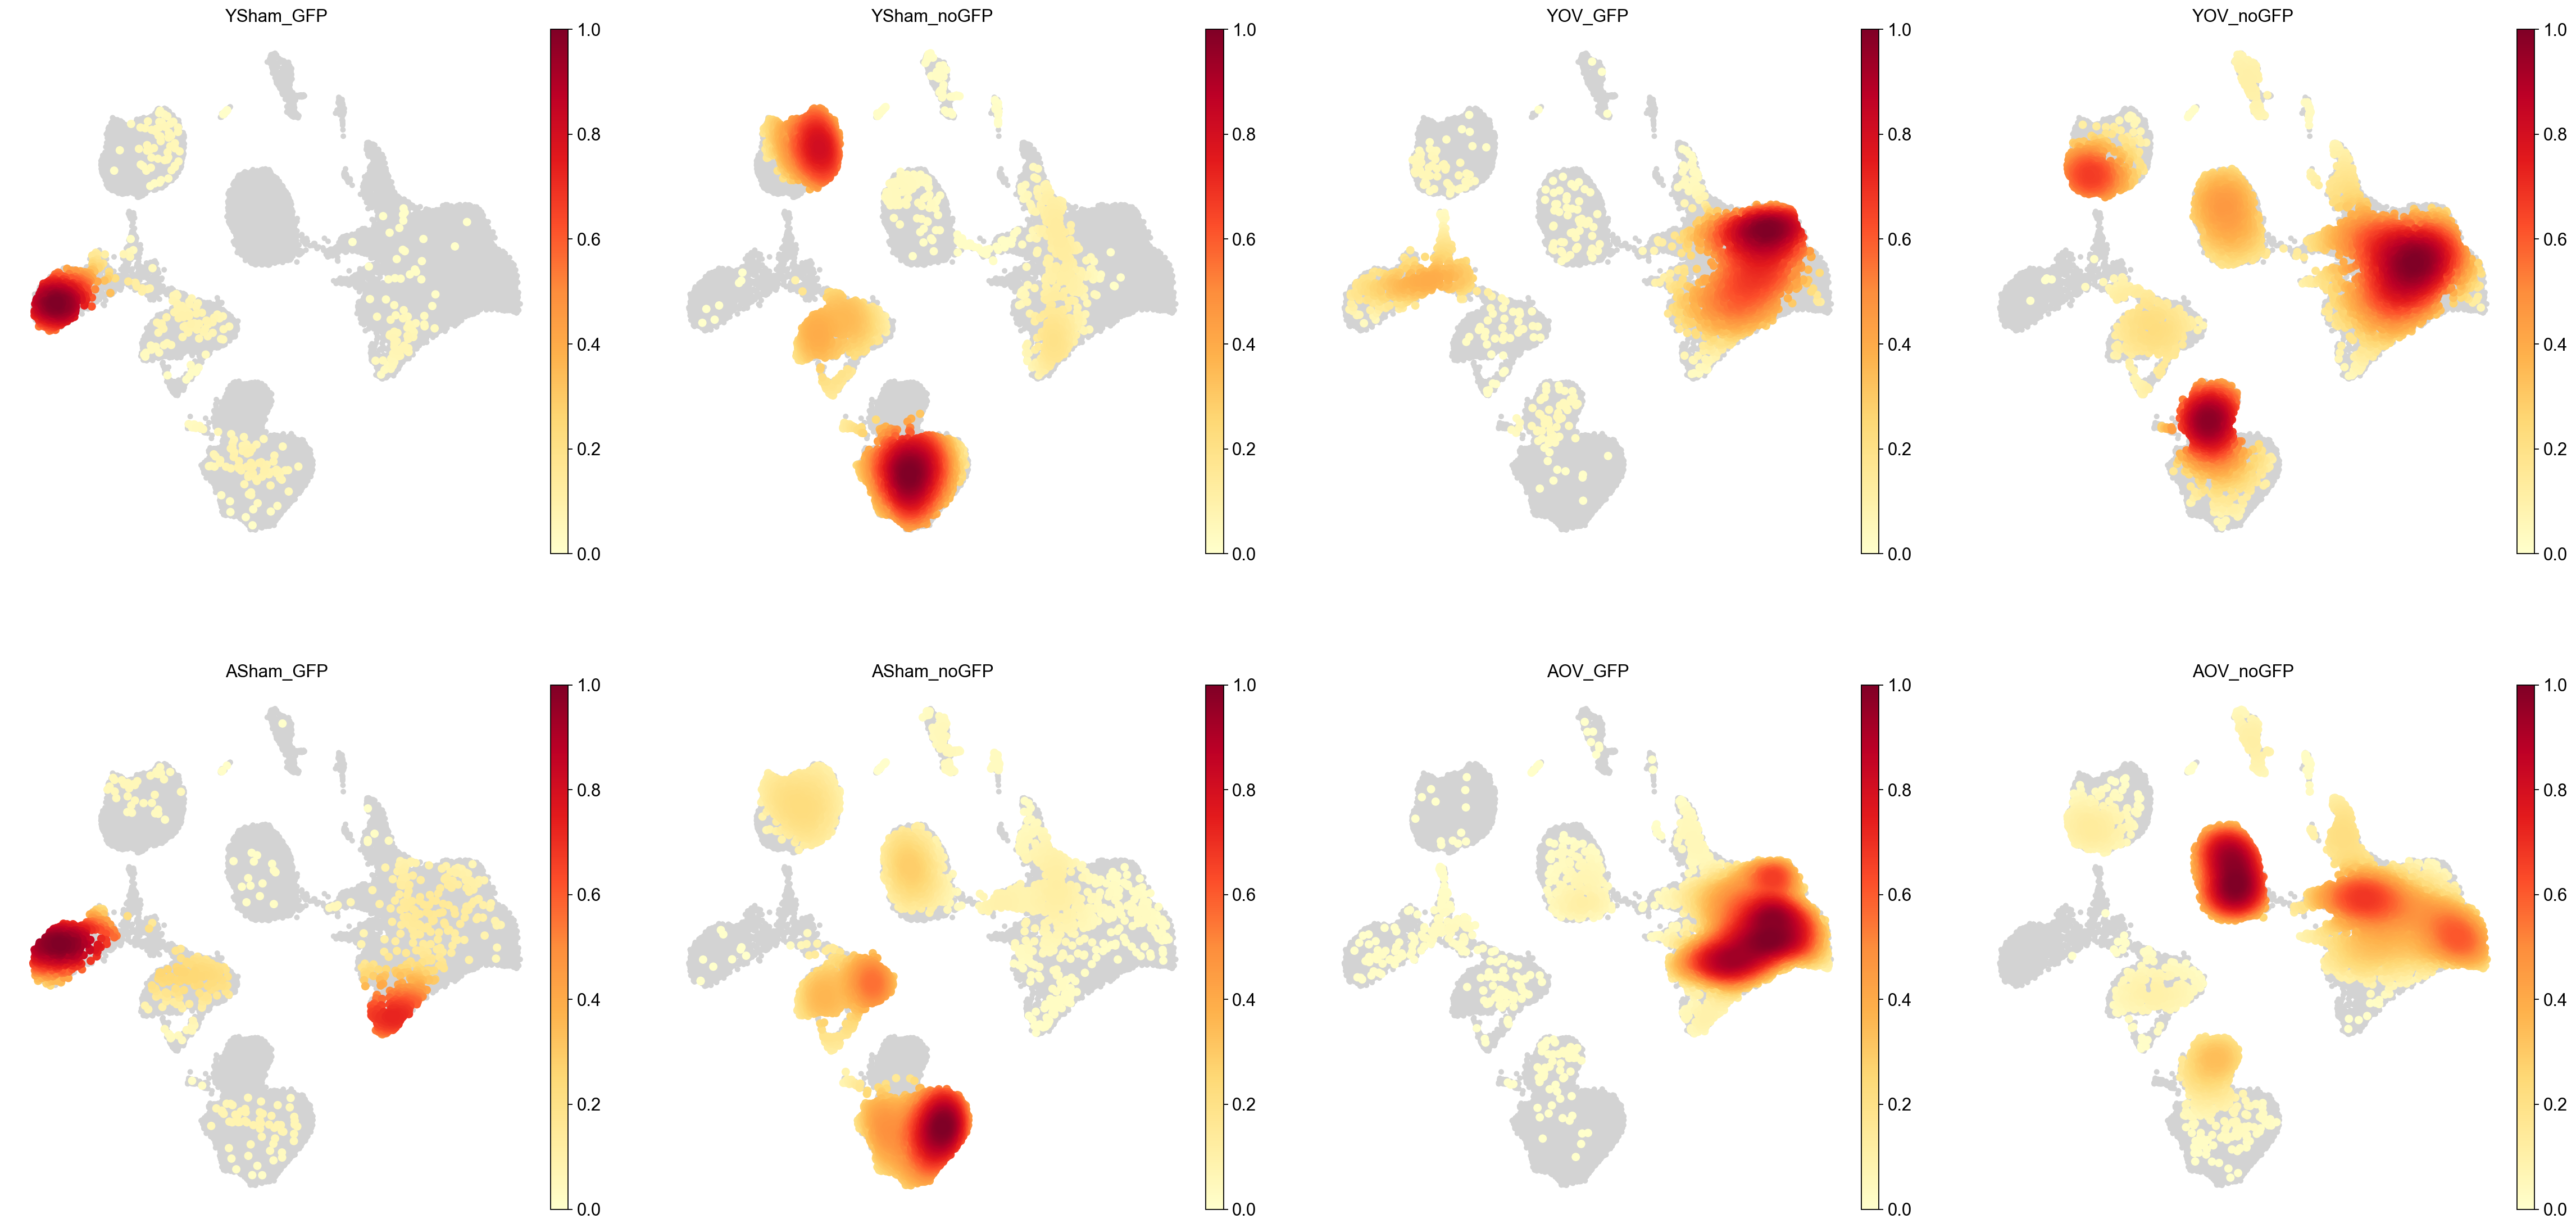

In [58]:
# Set figure size
pl.rcParams['figure.figsize'] = 8, 8
sc.pl.embedding_density(ad_filtered, groupby='Sample',ncols=4,frameon=False, save=f"umap_densityplot{img_tag}.png")



In [59]:
ad_filtered.obs[['umap_density_Sample','leiden','Sample']].to_csv('density_by_cluster_filteredbbb22mt5107.csv')